# Problem statement 1: Prepare a classification model using SVM for salary data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [4]:
saltrain = pd.read_csv("SalaryData_Train(1).csv")
saltrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


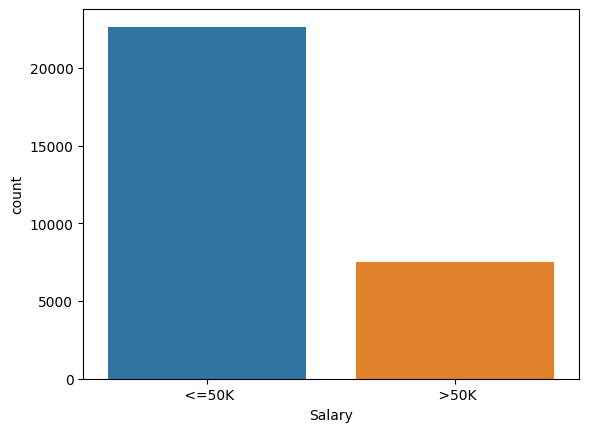

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [7]:
sns.countplot(x='Salary',data=saltrain)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
saltrain['Salary'].value_counts()

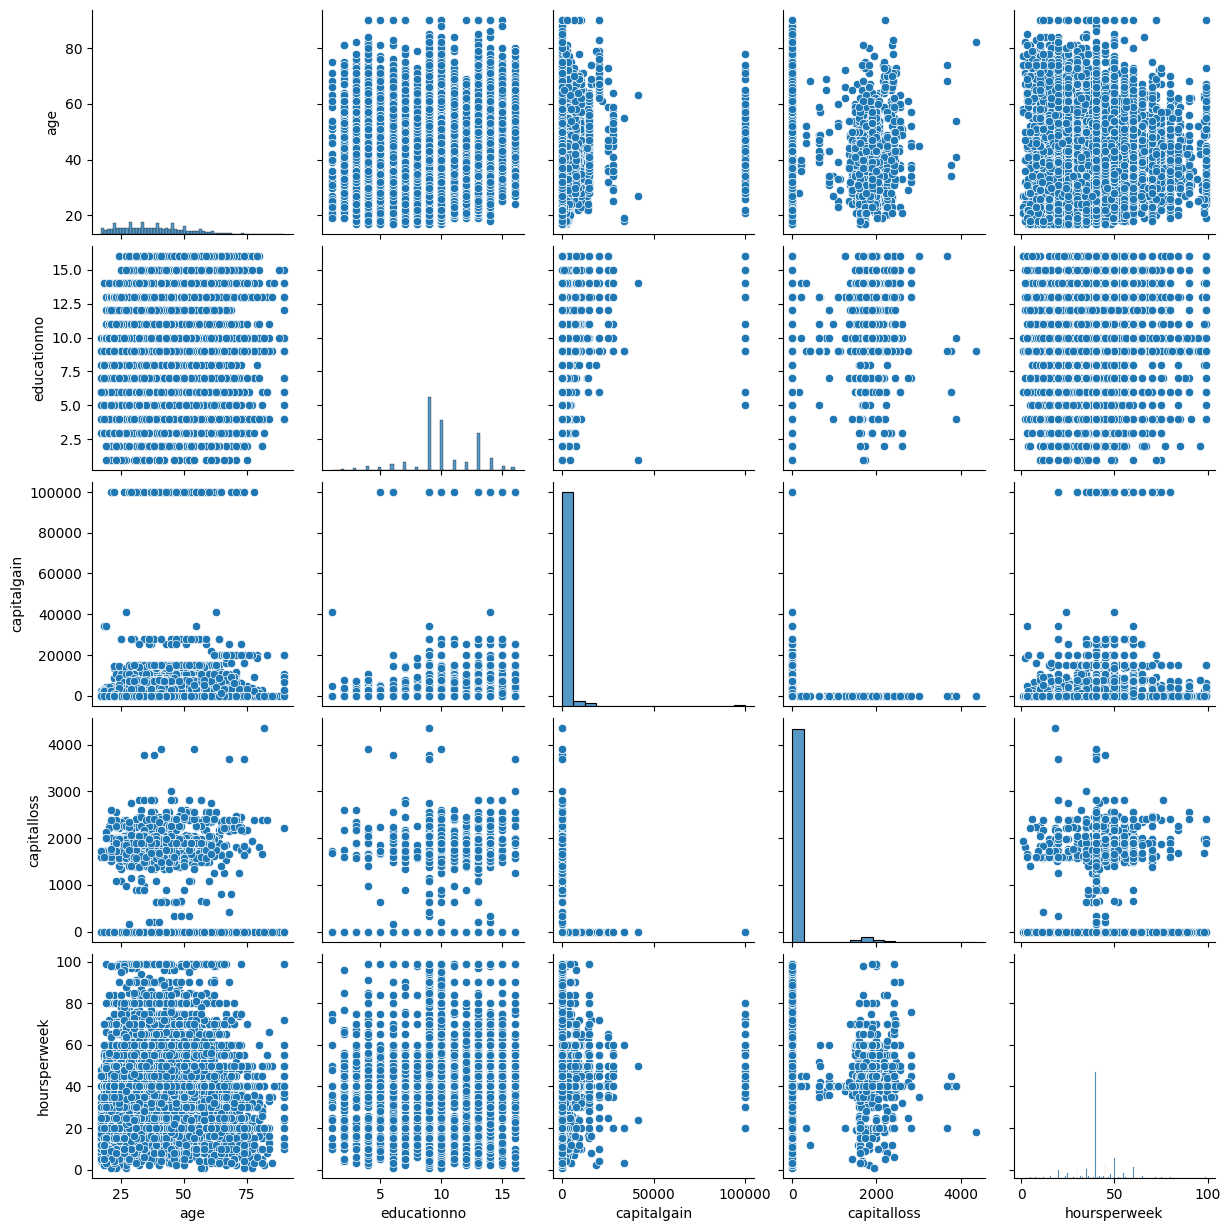

In [8]:
sns.pairplot(saltrain)

In [5]:
from sklearn import preprocessing

In [9]:
label_encoder = preprocessing.LabelEncoder()
saltrain['workclass'] = label_encoder.fit_transform(saltrain['workclass'])
saltrain['education'] = label_encoder.fit_transform(saltrain['education'])
saltrain['maritalstatus'] = label_encoder.fit_transform(saltrain['maritalstatus'])
saltrain['occupation'] = label_encoder.fit_transform(saltrain['occupation'])
saltrain['relationship'] = label_encoder.fit_transform(saltrain['relationship'])
saltrain['race'] = label_encoder.fit_transform(saltrain['race'])
saltrain['sex'] = label_encoder.fit_transform(saltrain['sex'])
saltrain['native'] = label_encoder.fit_transform(saltrain['native'])
saltrain['Salary'] = label_encoder.fit_transform(saltrain['Salary'])

In [10]:
saltrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [11]:
xtrain= saltrain.iloc[::,0:13:]
xtrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [12]:
ytrain= saltrain.iloc[::,13:14:]
ytrain

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
30156,0
30157,1
30158,0
30159,0


In [13]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [14]:
saltest = pd.read_csv("SalaryData_Test(1).csv")
saltest

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


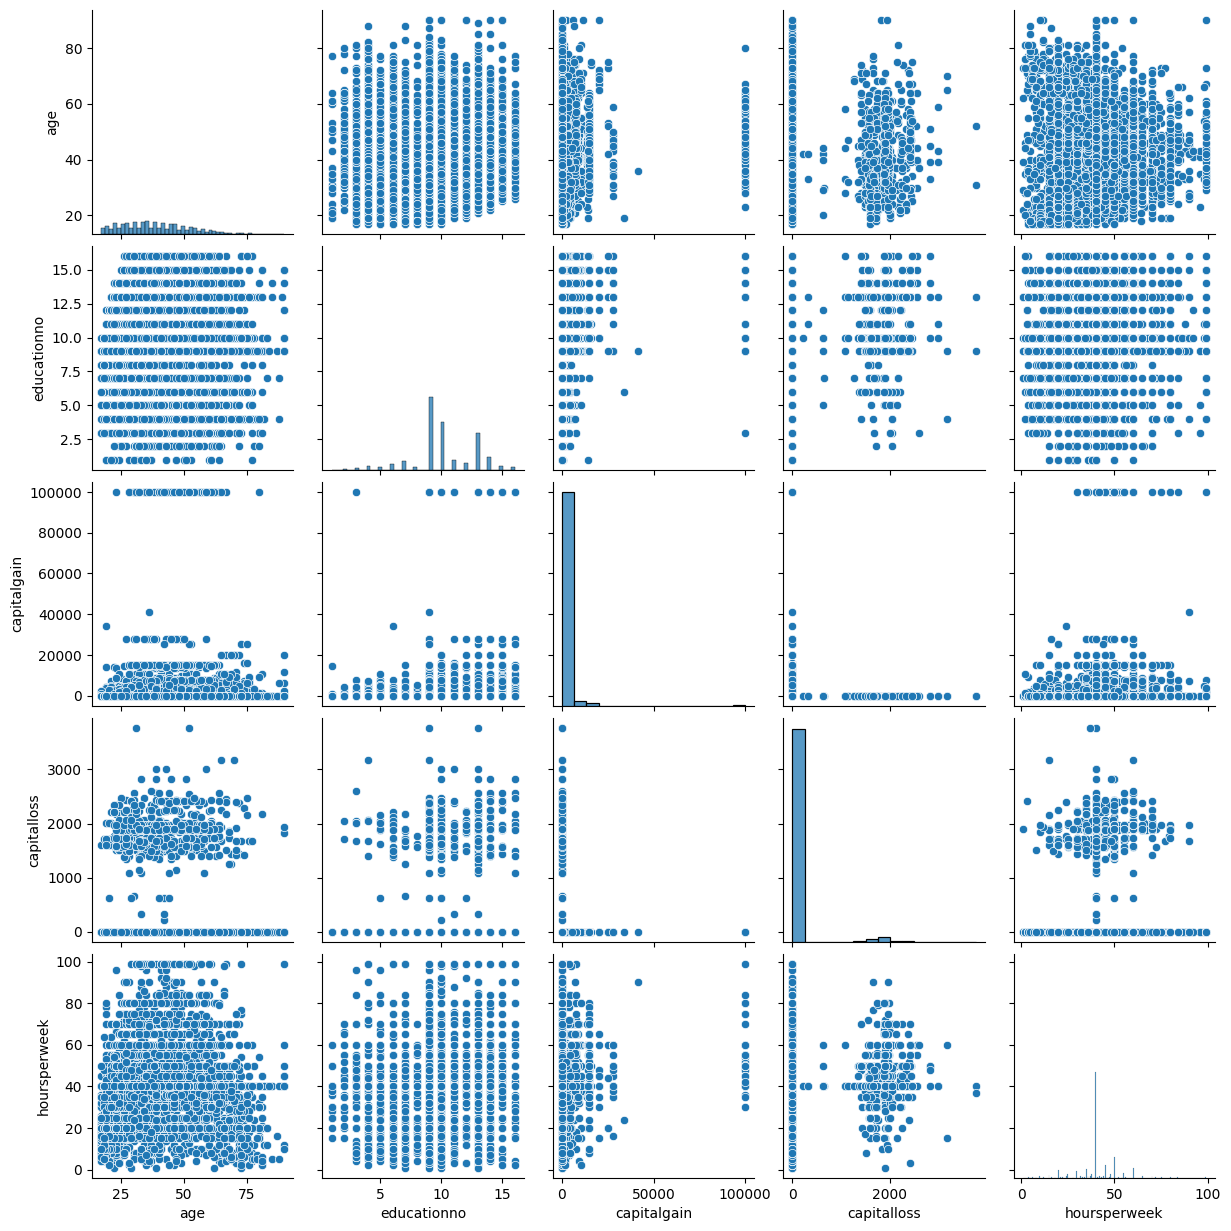

In [16]:
sns.pairplot(saltest)

In [17]:
from sklearn import preprocessing

In [18]:
label_encoder2 = preprocessing.LabelEncoder()
saltest['workclass'] = label_encoder2.fit_transform(saltest['workclass'])
saltest['education'] = label_encoder2.fit_transform(saltest['education'])
saltest['maritalstatus'] = label_encoder2.fit_transform(saltest['maritalstatus'])
saltest['occupation'] = label_encoder2.fit_transform(saltest['occupation'])
saltest['relationship'] = label_encoder2.fit_transform(saltest['relationship'])
saltest['race'] = label_encoder2.fit_transform(saltest['race'])
saltest['sex'] = label_encoder2.fit_transform(saltest['sex'])
saltest['native'] = label_encoder2.fit_transform(saltest['native'])
saltest['Salary'] = label_encoder2.fit_transform(saltest['Salary'])

In [19]:
saltest

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [20]:
xtest= saltest.iloc[::,0:13:]
xtest

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [21]:
ytest= saltest.iloc[::,13:14:]
ytest

,Salary
0,0
1,0
2,1
3,1
4,0
...,...
15055,0
15056,0
15057,0
15058,0


In [22]:
from sklearn import svm
from sklearn.svm import SVC

In [23]:
cff = SVC(kernel='rbf',gamma=0.01)
cff.fit(xtrain,ytrain)

SVC(gamma=0.01)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
ypre = cff.predict(xtest)

In [26]:
accuracy_score(ytest,ypre)

0.849003984063745

In [ ]:
#hence we are getting good accuracy score here

In [27]:
cff1 = SVC(kernel='rbf',gamma=0.001)
cff1.fit(xtrain,ytrain)

SVC(gamma=0.001)

In [28]:
ypre1 = cff1.predict(xtest)
accuracy_score(ytest,ypre1)

0.8458167330677291

In [ ]:
# Hence accuracy is not varying much it is good accuracy for this data. As rbf is giving good accuracy we can say that this is
# non linear data and rbf kernel fits well to the data

# Problem statement 2: classify the Size_Categorie using SVM

In [37]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires (1).csv


In [38]:
forestfire = pd.read_csv("forestfires.csv")
forestfire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [39]:
list(forestfire.columns)

['month',
 'day',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'area',
 'dayfri',
 'daymon',
 'daysat',
 'daysun',
 'daythu',
 'daytue',
 'daywed',
 'monthapr',
 'monthaug',
 'monthdec',
 'monthfeb',
 'monthjan',
 'monthjul',
 'monthjun',
 'monthmar',
 'monthmay',
 'monthnov',
 'monthoct',
 'monthsep',
 'size_category']

In [40]:
forestfire=forestfire.drop(['month','day'],axis=1)
forestfire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [41]:
forestfire.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

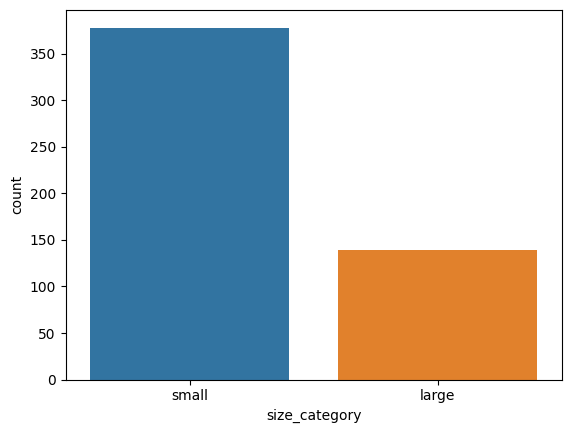

small    378
large    139
Name: size_category, dtype: int64

In [42]:
sns.countplot(x='size_category',data= forestfire)
plt.xlabel('size_category')
plt.ylabel('count')
plt.show()
forestfire['size_category'].value_counts()

In [43]:
forestfire.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [45]:
forestfire.size_category.replace(('small','large'),(0,1),inplace=True)

In [46]:
forestfire.size_category.value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [47]:
sns.pairplot(forestfire)

In [48]:
x= forestfire.iloc[::,0:28:]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y= forestfire.iloc[::,28:29:]
y

,size_category
0,0
1,0
2,0
3,0
4,0
...,...
512,1
513,1
514,1
515,0


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=18)

In [52]:
ytest

,size_category
328,0
259,0
1,0
198,1
243,0
...,...
313,0
469,1
300,0
216,1


In [53]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [54]:
clf = SVC(kernel='rbf',gamma=10)
clf.fit(xtrain,ytrain)

SVC(gamma=10)

In [55]:
ypreds= clf.predict(xtest)

In [56]:
accuracy_score(ytest,ypreds)

0.7788461538461539

In [ ]:
#Its accuracy is 77% so lets try with grid search

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
cclf = SVC()
param_grid = [{'kernel':["rbf"],'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[1,15,14,13,12,11,10,0.1] }]
gsv = GridSearchCV(cclf,param_grid,cv=10)
gsv.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [59]:
gsv.best_score_

0.895876887340302

In [60]:
gsv.best_params_

{'C': 13, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
# So this is giving the best model at C=13,gamma=0.0001 and kernel of rbf

In [ ]:
#lets try with the linear one

In [61]:
mgs = SVC(kernel='linear')
mgs.fit(xtrain,ytrain)

SVC(kernel='linear')

In [62]:
ypred2= mgs.predict(xtest)

In [63]:
accuracy_score(ytest,ypred2)

0.9903846153846154

In [ ]:
# So we are getting high accuracy on the linear kernel it means that data is linear and does not require any non linear kernel